### Relevante pakker

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

Merk: ChatGPT har blitt brukt for å få hjelp til å skrive deler av denne koden.

### Rense dataene

In [42]:

# Definitions replacing direct values
# cols = ['Price', 'Pages', 'Theme', 'Pieces']
# cols = ['Ages', 'Pages', 'Theme', 'Pieces']
cols = ['Pages', 'Ages', 'Theme', 'Pieces']

# mythemes = ['Star Wars', 'NINJAGO', 'Harry Potter']
mythemes = ['Voksen', 'Ungdom', 'Barn']


df = pd.read_csv("lego.population.csv", sep = ",", encoding = "latin1")
df

,Item_Number,Set_Name,Theme,Pieces,Price,Amazon_Price,Year,Ages,Pages,Minifigures,Packaging,Weight,Unique_Pieces,Availability,Size
0,41916,Extra Dots - Series 2,DOTS,109.0,$3.99,$3.44,2020.0,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
1,41908,Extra Dots - Series 1,DOTS,109.0,$3.99,$3.99,2020.0,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
2,11006,Creative Blue Bricks,Classic,52.0,$4.99,$4.93,2020.0,Ages_4+,37.0,NaN,Box,NaN,28.0,Retail,Small
3,11007,Creative Green Bricks,Classic,60.0,$4.99,$4.93,2020.0,Ages_4+,37.0,NaN,Box,NaN,36.0,Retail,Small
4,41901,Funky Animals Bracelet,DOTS,33.0,$4.99,$4.99,2020.0,Ages_6+,NaN,NaN,Foil pack,NaN,10.0,Retail,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,45678,SPIKE Prime Set,LEGO® Education,528.0,$329.95,NaN,2020.0,Ages_10+,NaN,2.0,NaN,NaN,108.0,NaN,Small
1300,71367,Mario's House & Yoshi,LEGO® Super Mario,205.0,$29.99,NaN,2020.0,Ages_6+,NaN,2.0,Box,NaN,114.0,Retail,Small
1301,71368,Toad's Treasure Hunt,LEGO® Super Mario,464.0,$69.99,NaN,2020.0,Ages_8+,NaN,4.0,Box,NaN,195.0,Retail,Small
1302,71369,Bowser's Castle Boss Battle,LEGO® Super Mario,1010.0,$99.99,NaN,2020.0,Ages_8+,NaN,NaN,Box,NaN,346.0,Retail,Small


In [43]:
# # fjerner forklaringsvariabler vi ikke trenger
# df2 = df[[cols[2], cols[3], cols[0], cols[1]]]

# # fjerner observasjoner med manglende datapunkter
# df2 = df2.dropna()

# # gjør themes om til string og fjern alle tegn vi ikke vil ha med
# df2[cols[2]] = df2[cols[2]].astype(str)
# df2[cols[2]] = df2[cols[2]].str.replace(r'[^a-zA-Z0-9\s-]', '', regex = True)

# # fjerner dollartegn og trademark-tegn fra datasettet
# df2[cols[0]] = df2[cols[0]].str.replace('\$', '', regex = True)

# # og gjør så prisen om til float
# df2[cols[0]] = df2[cols[0]].astype(float)



df = pd.read_csv("lego.population.csv", sep = ",", encoding = "latin1")

df = df[[cols[3], 'Ages', cols[0]]]

df2 = df

# Remove any leading/trailing whitespace from "Ages", and then remove 1 1/2 from Ages
df2['Ages'] = df2['Ages'].str.strip()
df2 = df2[df2['Ages'] != 'Ages_1½']

# Trim Ages enstries to only keep numbers
df2['Ages'] = df2['Ages'].str.replace('Ages_', '').str.replace('+', '').str.replace('-.*', '')

# Convert age strings to int
df2['Ages'] = pd.to_numeric(df2['Ages'], errors='coerce').fillna(0).astype(int)

# Drop every age less than 3 years old
df2 = df2[df2['Ages'] > 3]


def calc_age_group(row):
    if row['Ages'] < 10:
        return mythemes[0]
    if row['Ages'] >= 10 and row['Ages'] < 15:
        return mythemes[1]
    if row['Ages'] >= 15:
        return mythemes[2]

df2 = df2.assign(Theme=df2.apply(calc_age_group, axis=1))

df2 = df2.dropna()

df2

,Pieces,Ages,Pages,Theme
2,52.0,4,37.0,Voksen
3,60.0,4,37.0,Voksen
13,95.0,6,40.0,Voksen
14,1.0,4,1.0,Voksen
16,69.0,4,28.0,Voksen
...,...,...,...,...
1173,3178.0,16,452.0,Barn
1174,3120.0,16,464.0,Barn
1175,1105.0,10,556.0,Ungdom
1176,3662.0,18,564.0,Barn


### Mer eller mindre relevante kodesnutter

In [44]:
print(df2.mean(numeric_only = True))

Pieces    456.211876
Ages        7.639676
Pages     105.423752
dtype: float64


In [45]:
print(df2[cols[2]].value_counts())

Theme
Voksen    589
Ungdom    113
Barn       39
Name: count, dtype: int64


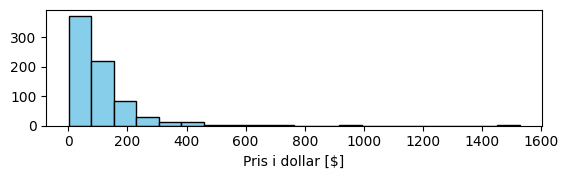

In [46]:
plt.hist(df2[cols[0]], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Pris i dollar [$]')
plt.ylabel('')
plt.gca().set_aspect(1)
plt.show()

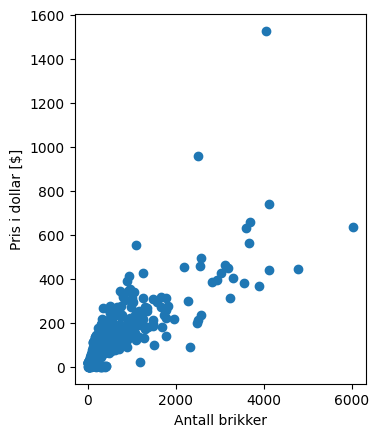

In [47]:
plt.scatter(df2[cols[3]], df2[cols[0]])
plt.xlabel('Antall brikker')
plt.ylabel('Pris i dollar [$]')
plt.gca().set_aspect(5)
plt.show()

In [48]:
# hva er det dyreste settet i datasettet mon tro?
print(df2.loc[df2[cols[0]].idxmax()])

Pieces    4057.0
Ages          11
Pages     1527.0
Theme     Ungdom
Name: 814, dtype: object


In [49]:
# og hvilket har flest brikker?
print(df2.loc[df2[cols[3]].idxmax()])

Pieces    6020.0
Ages          16
Pages      636.0
Theme       Barn
Name: 821, dtype: object


In [50]:
# hvilke tema har de billigste settene?
df2.groupby(cols[2])[cols[0]].mean().sort_values(ascending=True)[:3]

Theme
Voksen     87.398981
Ungdom    142.451327
Barn      270.358974
Name: Pages, dtype: float64

In [51]:
# hvilke tema har flest brikker?
df2.groupby(cols[2])[cols[3]].mean().sort_values(ascending=False)[:3]

Theme
Barn      2120.923077
Ungdom     655.876106
Voksen     307.679117
Name: Pieces, dtype: float64

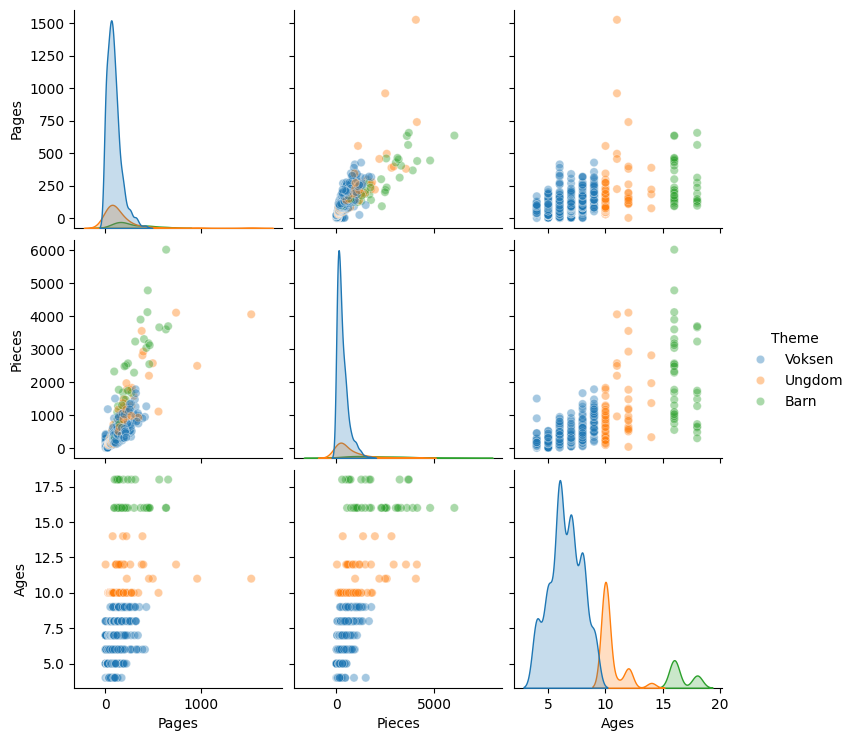

In [52]:
sns.pairplot(df2, vars = [cols[0], cols[3], cols[1]],
             hue = cols[2], 
             diag_kind = 'kde',
             plot_kws = dict(alpha = 0.4))
plt.show()

In [53]:
# enkel lineær regresjon
formel = cols[0] + ' ~ ' + cols[3]

modell = smf.ols(formel, data = df2)
resultat = modell.fit()

resultat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Pages   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     1468.
Date:                Thu, 09 Nov 2023   Prob (F-statistic):          9.43e-178
Time:                        15:55:15   Log-Likelihood:                -4170.2
No. Observations:                 741   AIC:                             8344.
Df Residuals:                     739   BIC:                             8354.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.8847      3.009     13.257      0.000      33.978      45.791
Pieces         0.1437      0.004     38.316      0.000       0.136       0.151
==============================================================================
Omnibus:                      742.228   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            86467.841
Skew:                           4.210   Prob(JB):                         0.00
Kurtosis:                      55.246   Cond. No.                         975.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

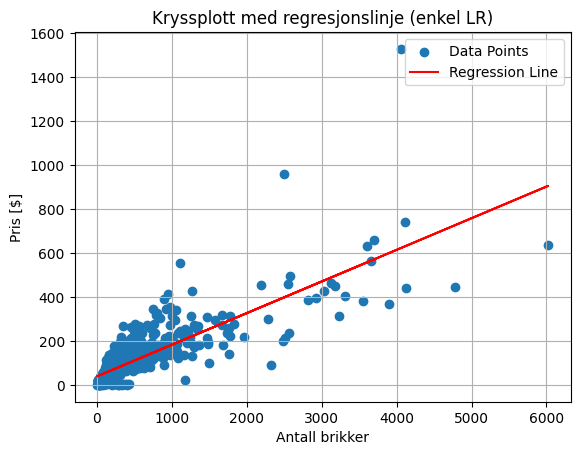

In [54]:
slope = resultat.params[cols[3]]
intercept = resultat.params['Intercept']

regression_x = np.array(df2[cols[3]])

regression_y = slope * regression_x + intercept

plt.scatter(df2[cols[3]], df2[cols[0]], label='Data Points')
plt.plot(regression_x, regression_y, color='red', label='Regression Line')
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinje (enkel LR)')
plt.legend()
plt.grid()
plt.show()

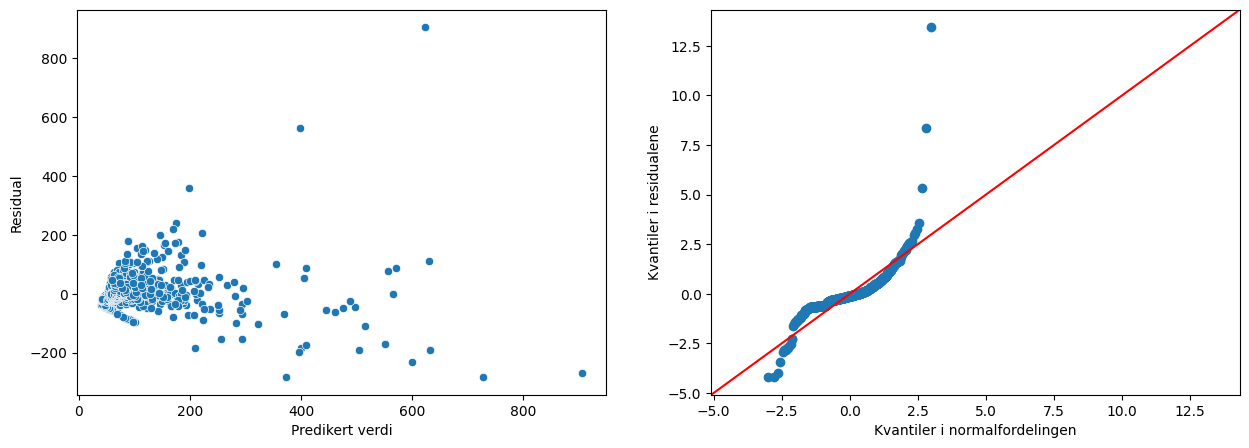

In [55]:
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = resultat.fittedvalues, y = resultat.resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

sm.qqplot(resultat.resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()

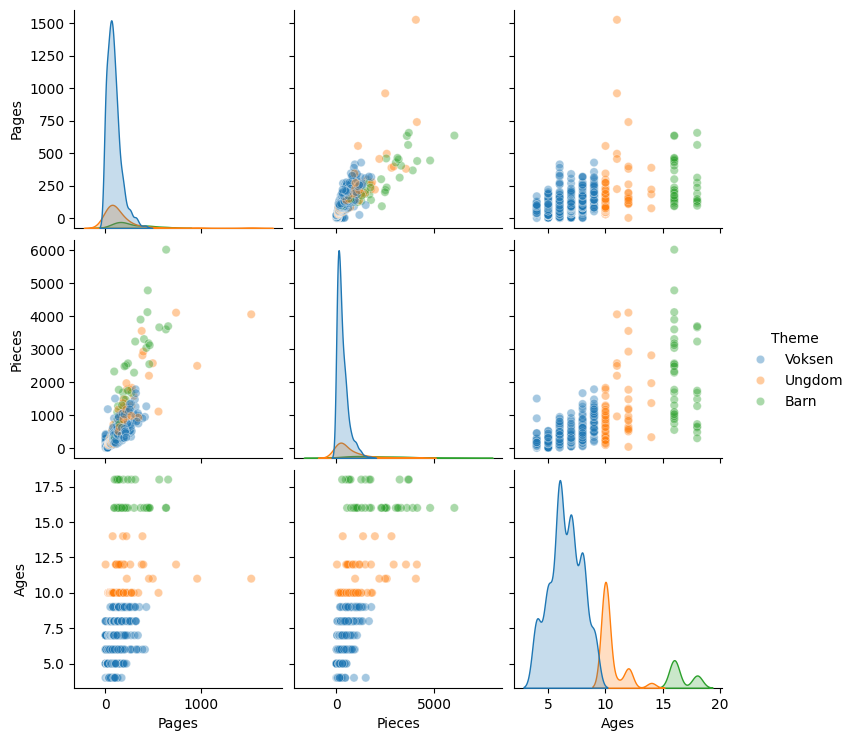

In [56]:
# mythemes = ['Star Wars', 'NINJAGO', 'Harry Potter']
subset_df = df2[df2[cols[2]].isin(mythemes)]
sns.pairplot(subset_df, vars = [cols[0], cols[3], cols[1]],
             hue = cols[2], 
             diag_kind = 'kde',
             plot_kws = dict(alpha = 0.4))
plt.show()

In [57]:
# enkel lineær regresjon, tar ikke hensyn til tema
res_sub = smf.ols(cols[0] + ' ~ ' + cols[3], data = subset_df).fit()

In [58]:
# enkel LR for hvert tema hver for seg
resultater = []
for i, theme in enumerate(mythemes):
    modell3 = smf.ols(cols[0] + ' ~ ' + cols[3], data = subset_df[subset_df[cols[2]].isin([theme])])
    resultater.append(modell3.fit())

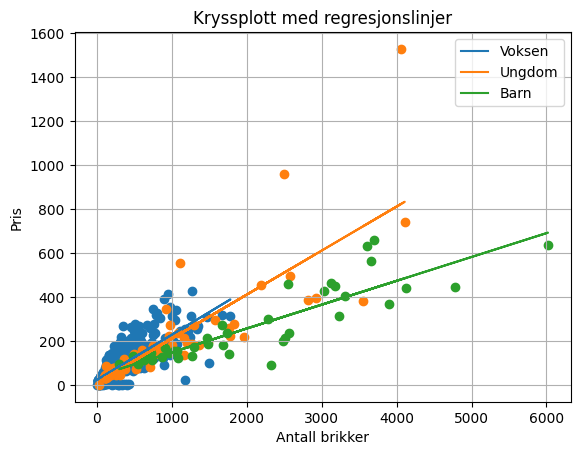

In [59]:
# plott av dataene og regresjonslinjene
for i, theme in enumerate(mythemes):
    slope = resultater[i].params[cols[3]]
    intercept = resultater[i].params['Intercept']

    regression_x = np.array(subset_df[subset_df[cols[2]].isin([theme])][cols[3]])
    regression_y = slope * regression_x + intercept

    # Plot scatter plot and regression line
    plt.scatter(subset_df[subset_df[cols[2]].isin([theme])][cols[3]], subset_df[subset_df[cols[2]].isin([theme])][cols[0]], color=plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=theme)
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

## 

In [70]:
# multippel lineær regresjon
modell3_mlr = smf.ols(cols[0] + ' ~ ' + cols[3] + ' + Theme' , data = subset_df)
modell3_mlr.fit().summary()


Intercept          -87.206744
Theme[T.Ungdom]    119.084136
Theme[T.Voksen]    122.734205
Pieces               0.168590
dtype: float64

In [61]:
# multippel lineær regresjon med en annen referansekategori
modell3_mlr_alt = smf.ols(cols[0] + ' ~ ' + cols[3] + ' + C(Theme, Treatment("' + mythemes[0] + '"))' , data = subset_df)
modell3_mlr_alt.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Pages   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     574.0
Date:                Thu, 09 Nov 2023   Prob (F-statistic):          2.65e-192
Time:                        15:55:17   Log-Likelihood:                -4129.2
No. Observations:                 741   AIC:                             8266.
Df Residuals:                     737   BIC:                             8285.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  35.5275      2.979     11.928      0.000      29.680      41.375
C(Theme, Treatment("Voksen"))[T.Barn]    -122.7342     13.389     -9.167      0.000    -149.020     -96.449
C(Theme, Treatment("Voksen"))[T.Ungdom]    -3.6501      6.744     -0.541      0.588     -16.889       9.589
Pieces                                      0.1686      0.005     37.103      0.000       0.160       0.178
==============================================================================
Omnibus:                      667.747   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58363.811
Skew:                           3.599   Prob(JB):                         0.00
Kurtosis:                      45.878   Cond. No.                     4.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
intercept = [modell3_mlr.fit().params['Theme[T.' + mythemes[0] + ']'], modell3_mlr.fit().params['Theme[T.' + mythemes[1] + ']'], 0] + modell3_mlr.fit().params['Intercept']
intercept[1]

31.877392153831494

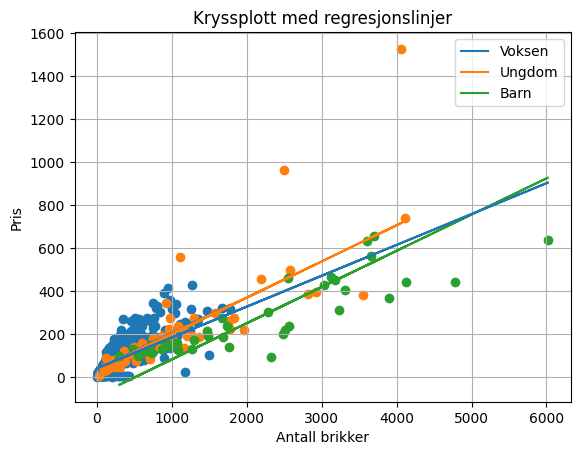

In [87]:
# plott
intercept = [modell3_mlr.fit().params['Theme[T.' + mythemes[0] + ']'], modell3_mlr.fit().params['Theme[T.' + mythemes[1] + ']'], 0] + modell3_mlr.fit().params['Intercept']
slope = modell3_mlr.fit().params[cols[3]]

for i, theme in enumerate(mythemes):

    regression_x = np.array(subset_df[subset_df[cols[2]].isin([theme])][cols[3]])
    regression_y = slope * regression_x + intercept[i]

    # Plot scatter plot and regression line
    plt.scatter(subset_df[subset_df[cols[2]].isin([theme])][cols[3]], subset_df[subset_df[cols[2]].isin([theme])][cols[0]], color = plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=theme)
    
# uten tema som forklaringsvariabel:
regression_x = np.array(subset_df[cols[3]])
regression_y = res_sub.params[cols[3]] * regression_x + res_sub.params['Intercept']
plt.plot(regression_x, regression_y)
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

In [63]:
# med interaksjonsledd mellom antall brikker og tema
modell3_mlri = smf.ols(cols[0] + ' ~ ' + cols[3] + '*Theme' , data = subset_df)
modell3_mlri.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Pages   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     418.3
Date:                Thu, 09 Nov 2023   Prob (F-statistic):          3.52e-212
Time:                        15:55:17   Log-Likelihood:                -4076.6
No. Observations:                 741   AIC:                             8165.
Df Residuals:                     735   BIC:                             8193.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 40.7111     17.827      2.284      0.023       5.712      75.710
Theme[T.Ungdom]          -29.4147     19.207     -1.531      0.126     -67.121       8.292
Theme[T.Voksen]          -16.3831     18.182     -0.901      0.368     -52.078      19.312
Pieces                     0.1083      0.007     15.245      0.000       0.094       0.122
Pieces:Theme[T.Ungdom]     0.0917      0.010      9.346      0.000       0.072       0.111
Pieces:Theme[T.Voksen]     0.0967      0.011      8.765      0.000       0.075       0.118
==============================================================================
Omnibus:                      576.811   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37610.001
Skew:                           2.909   Prob(JB):                         0.00
Kurtosis:                      37.414   Cond. No.                     1.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

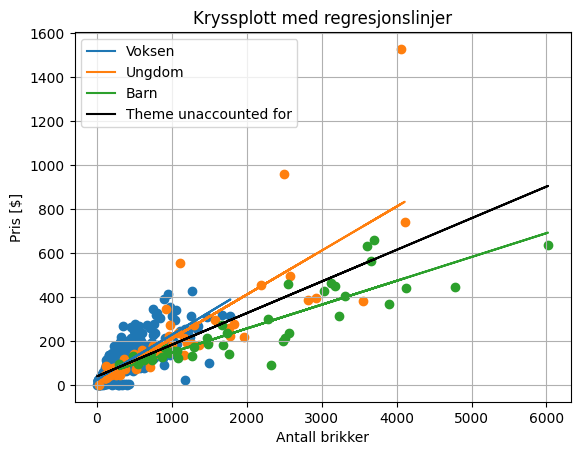

In [64]:
# plott
intercept = [modell3_mlri.fit().params['Theme[T.' + mythemes[0] + ']'], modell3_mlri.fit().params['Theme[T.' + mythemes[1] + ']'], 0] + modell3_mlri.fit().params['Intercept']
slope = [modell3_mlri.fit().params[cols[3] + ':Theme[T.' + mythemes[0] + ']'], modell3_mlri.fit().params['' + cols[3] + ':Theme[T.' + mythemes[1] + ']'], 0] + modell3_mlri.fit().params[cols[3]]

for i, theme in enumerate(mythemes):

    regression_x = np.array(subset_df[subset_df[cols[2]].isin([theme])][cols[3]])
    regression_y = slope[i] * regression_x + intercept[i]

    # Plot scatter plot and regression line
    plt.scatter(subset_df[subset_df[cols[2]].isin([theme])][cols[3]], subset_df[subset_df[cols[2]].isin([theme])][cols[0]], color=plt.cm.tab10(i))
    plt.plot(regression_x, regression_y, color=plt.cm.tab10(i), label=theme)
    
# uten tema som forklaringsvariabel:
regression_x = np.array(subset_df[cols[3]])
regression_y = res_sub.params[cols[3]] * regression_x + res_sub.params['Intercept']
plt.plot(regression_x, regression_y)
# plt.plot(regression_x, regression_y, color='black', label='Theme unaccounted for')
    
plt.xlabel('Antall brikker')
plt.ylabel('Pris [$]')
plt.title('Kryssplott med regresjonslinjer')
plt.legend()
plt.grid()
plt.show()

In [65]:
# Kode for å lagre plot som (.png)
## fjern 'plt.show()' og erstatt med:
# plt.savefig('my_plot.png')

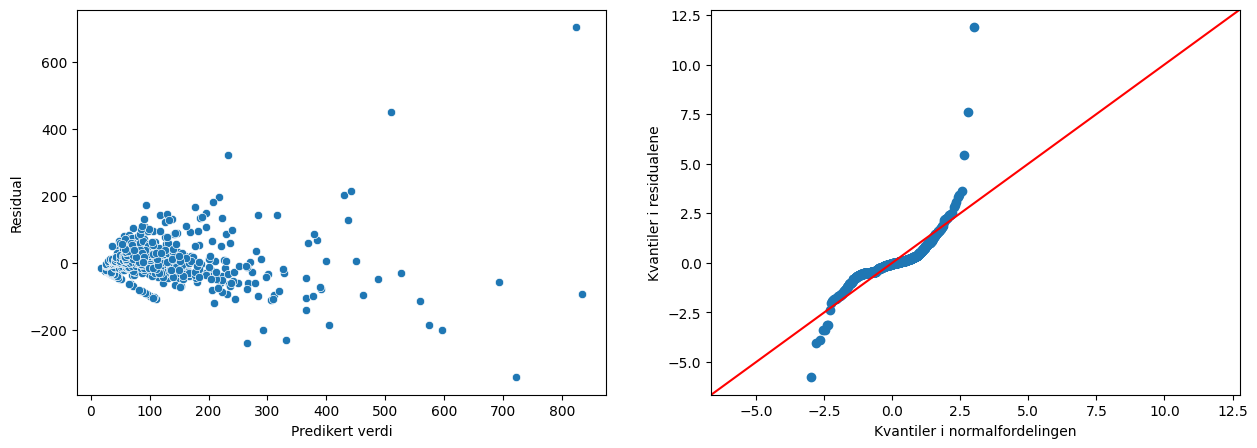

In [66]:
# Steg 5: Evaluere om modellen passer til dataene
# Plotte predikert verdi mot residual
figure, axis = plt.subplots(1, 2, figsize = (15, 5))
sns.scatterplot(x = modell3_mlri.fit().fittedvalues, y = modell3_mlri.fit().resid, ax = axis[0])
axis[0].set_ylabel("Residual")
axis[0].set_xlabel("Predikert verdi")

# Lage kvantil-kvantil-plott for residualene
sm.qqplot(modell3_mlri.fit().resid, line = '45', fit = True, ax = axis[1])
axis[1].set_ylabel("Kvantiler i residualene")
axis[1].set_xlabel("Kvantiler i normalfordelingen")
plt.show()

In [67]:
# Gruppere temaer i nye grupper:
# (Harry Potter, NINJAGO og Star Wars havner i én gruppe, City og Friends i en annen, og alle andre i en tredje)
df2['cat'] = np.where(df2[cols[2]].isin([mythemes[2], mythemes[1], mythemes[0]]), 'Cat1', 
                      np.where(df2[cols[2]].isin(['City', 'Friends']), 'Cat2', 'Cat3'))
df2.groupby(['cat']).size().reset_index(name = 'Count')

,cat,Count
0,Cat1,741


In [68]:
df2.groupby(['cat', cols[2]]).size().reset_index(name = 'Count')

,cat,Theme,Count
0,Cat1,Barn,39
1,Cat1,Ungdom,113
2,Cat1,Voksen,589
